In [835]:
# Finding the scale length of a BFE
# TODO make plots with rho vs r for all the iterations finding bound particles
# make plot of fs vs number of iterations to see how it evolves
# mkje plor of N coeff vs rs to see how the optimiation of rs helps estimaitng the coefficients.

In [273]:
%pylab inline
import sys
sys.path.append('../src/')
import io_snaps
from scipy import optimize
import coefficients_smoothing
import gala.potential as gp
import gala.potential.scf as scf
import biff

Populating the interactive namespace from numpy and matplotlib


In [71]:
path = '/home/xzk/work/github/MW_anisotropy/code/test_snaps/'
#snap1 = 'MWLMC3_100M_new_b1_091'
#snap2 = 'MWLMC4_100M_new_b0_114'
#snap3 = 'MWLMC5_100M_new_b1_110'
snap4 = 'MWLMC6_2_100M_new_b1_112'

#satellite1 = io_snaps.read_snap_coordinates(path, snap1, 100000000, 'sat', 'sat')
#satellite2 = io_snaps.read_snap_coordinates(path, snap2, 100000000, 'sat', 'sat')
#satellite3 = io_snaps.read_snap_coordinates(path, snap3, 100000000, 'sat', 'sat')
satellite4 = io_snaps.read_snap_coordinates(path, snap4, 100000000, 'sat', 'sat')

Loading snapshot: /home/xzk/work/github/MW_anisotropy/code/test_snaps/MWLMC6_2_100M_new_b1_112
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Potential
Returning DM    Mass
Loading MW particles and LMC particles
Loading satellite particles
Computing coordinates in the satellite COM frame
[ -3.05265524 -20.97229527   6.06530817] 3
(array([ -3.05265524, -20.97229527,   6.06530817]), array([-12.91614162, -35.70487796,  97.24518659]))
(array([ 16.56449821,  79.79273867, -35.59111834]), array([ -22.42910741, -154.72093882,   61.20265058]))
(array([ -4.85518065, -47.57231775,  -0.43529016]), array([ -7.79972505, -36.06076096,  32.89917533]))
(array([ -3.05265524, -20.97229527,   6.06530817]), array([-12.91614162, -35.70487796,  97.24518659]))
(array([-6.30704252e-05,  2.33404868e-04, -6.84585896e-04]), array([-0.01461939, -0.14300311, -0.00502748]))
[  8.65659926  11.24835905 -29.96178491] [ -43.15959348 -226.62958084  191.34198503]
[  8.656

In [69]:
"""
pos_satellite1 = satellite1[0]
mass_satellite1 = satellite1[3]

pos_satellite2 = satellite2[0]
mass_satellite2 = satellite2[3]

pos_satellite3 = satellite3[0]
mass_satellite3 = satellite3[3]
"""
pos_satellite4 = satellite4[0]
mass_satellite4 = satellite4[3]

In [70]:
def scatter_plot(pos, npart):
    npart_rand = np.random.randint(0, len(pos), npart)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].scatter(pos[npart_rand, 0], pos[npart_rand, 1], c='k', s=1)
    ax[1].scatter(pos[npart_rand, 1], pos[npart_rand, 2], c='k', s=1)
    ax[0].scatter(0,0, c='r', s=60)
    ax[1].scatter(0,0, c='r', s=60)
    ax[0].set_xlim(-50, 50)
    ax[0].set_ylim(-50, 50)
    ax[1].set_xlim(-50, 50)
    ax[1].set_ylim(-50, 50)

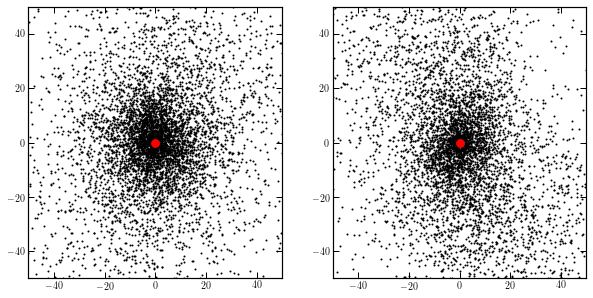

In [723]:
scatter_plot(pos_satellite4, 10000)

In [813]:
def enclosed_mass(pos, m):
    r = np.sqrt(np.sum(pos**2, axis=1))
    r_bins = np.arange(0, 50, 1)
    dr = (r_bins[1]-r_bins[0])/2.
    nbins = len(r_bins)
    rho = np.zeros(nbins-1)
    m_tot = np.zeros(nbins)
    m_cumulative = np.zeros(nbins)
    for i in range(nbins-1):
        index = np.where((r<r_bins[i+1]) & (r>=r_bins[i]))[0]
        m_shell = np.sum(m[index])
        v = 4/3. * np.pi * (r_bins[i+1]**3 - r_bins[i]**3)
        rho[i] = m_shell/v
        m_tot[i] = m_shell
        m_cumulative[i] = np.sum(m_tot[:i+1])
    return rho, r_bins[:-1] + dr, m_tot[:-1], m_cumulative[:-1]
        

In [814]:
def hernquist_mass_rf(a, r, M, mencl):
    print(mencl, M*r**2. / (r+a)**2., a)
    return mencl-(M*r**2. / (r+a)**2.) 

def hernquist_mass(r, a, M):
    return M*r**2. / (r+a)**2.


def hernquist_rho(r, a, M):
    return M*a / (2.*np.pi*r*(r+a)**3.)

In [815]:
def find_scale_length(pos, mass, rs_max):
    rho, r, m, m_c = enclosed_mass(pos, mass)
    M = 3*np.sum(mass)
   
    rs_opt = optimize.curve_fit(hernquist_mass, r, m_c, bounds=(0, [rs_max, M]))
    #rs_opt = optimize.root_scalar(hernquist_mass_rf, args=(r[r_encl], M, m_c[r_encl]), 
    #                              bracket=[0,rs_max], method='bisect')
    print(rs_opt)
    return rs_opt[0]

In [816]:
#rho1, r1, m1, m_c1 = enclosed_mass(pos_satellite1, mass_satellite1)
#rho2, r2, m2, m_c2 = enclosed_mass(pos_satellite2, mass_satellite2)
#rho3, r3, m3, m_c3 = enclosed_mass(pos_satellite3, mass_satellite3)
rho4, r4, m4, m_c4 = enclosed_mass(pos_satellite4, mass_satellite4)

In [819]:
#rs_opt1 = find_scale_length(pos_satellite1, mass_satellite1, 30)
#rs_opt2 = find_scale_length(pos_satellite2, mass_satellite2, 30)
#rs_opt3 = find_scale_length(pos_satellite3, mass_satellite3, 30)
rs_opt4 = find_scale_length(pos_satellite4, mass_satellite4, 30)

(array([22.08517537, 22.95852195]), array([[0.00409258, 0.00333541],
       [0.00333541, 0.00282294]]))


In [820]:
#print(rs_opt1, rs_opt2, rs_opt3, rs_opt4)
print(rs_opt4)

[22.08517537 22.95852195]


In [823]:
#m_hern1 = hernquist_mass(r1, np.sum(mass_satellite1), rs_opt1)
#m_hern2 = hernquist_mass(r2, np.sum(mass_satellite2), rs_opt2)
#m_hern3 = hernquist_mass(r3, np.sum(mass_satellite3), rs_opt3)
m_hern4 = hernquist_mass(r4, rs_opt4[0], np.sum(mass_satellite4))

#rho_hern1 = hernquist_rho(r1, np.sum(mass_satellite1), rs_opt1)
#rho_hern2 = hernquist_rho(r2, np.sum(mass_satellite2), rs_opt2)
#rho_hern3 = hernquist_rho(r3, np.sum(mass_satellite3), rs_opt3)
rho_hern4 = hernquist_rho(r4, rs_opt4[0], np.sum(mass_satellite4))

#m_hern_init1 = hernquist_mass(r1, np.sum(mass_satellite1), 10.4)
#m_hern_init2 = hernquist_mass(r2, np.sum(mass_satellite2), 12.7)
#m_hern_init3 = hernquist_mass(r3, np.sum(mass_satellite3), 20)
m_hern_init4 = hernquist_mass(r4, np.sum(mass_satellite4), 25.2)

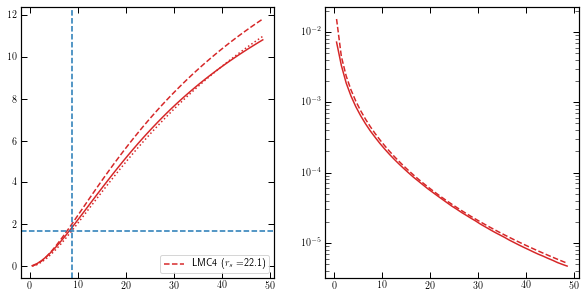

In [822]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#ax[0].plot(r1, m_c1, c='C0')
#ax[0].plot(r1, m_hern1, c='C0', ls='--', label='LMC1 ($r_s=${:.1f})'.format(rs_opt1))
#ax[0].plot(r1, m_hern_init1, c='C0', ls=':')


#ax[0].plot(r2, m_c2, c='C1')
#ax[0].plot(r2, m_hern2, c='C1', ls='--', label='LMC2 ($r_s=${:.1f})'.format(rs_opt2))
#ax[0].plot(r2, m_hern_init2, c='C1', ls=':')

#ax[0].plot(r3, m_c3, c='C2')
#ax[0].plot(r3, m_hern3, c='C2', ls='--', label='LMC3 ($r_s=${:.1f})'.format(rs_opt3))
#ax[0].plot(r3, m_hern_init3, c='C2', ls=':')


ax[0].plot(r4, m_c4, c='C3')
ax[0].plot(r4, m_hern4, c='C3', ls='--', label='LMC4 ($r_s=${:.1f})'.format(rs_opt4[0]))
ax[0].plot(r4, m_hern_init4, c='C3', ls=':')


#ax[1].semilogy(r1, rho1 , c='C0', label='sims')
#ax[1].semilogy(r1, rho_hern1, c='C0', ls='--', label='fit')

#ax[1].semilogy(r2, rho2, c='C1')
#ax[1].semilogy(r2, rho_hern2, c='C1', ls='--')

#ax[1].semilogy(r3, rho3, c='C2')
#ax[1].semilogy(r3, rho_hern3, c='C2', ls='--')

ax[1].semilogy(r4, rho4, c='C3')
ax[1].semilogy(r4, rho_hern4, c='C3', ls='--')

ax[1].legend()
ax[0].legend()

ax[0].axvline(8.7, ls='--')
ax[0].axhline(1.7, ls='--')



In [673]:
#ids 

In [606]:
ids_bound = np.loadtxt('../../MW-LMC-SCF/code/lmc_bound_rs/MWLMC6_100M_new_b1_2_bound_sat_ids_112')

In [608]:
ids_all = satellite4[4]

In [609]:
index_bound = np.in1d(ids_all, ids_bound)

In [611]:
index_unbound = np.where(index_bound == False)[0]


In [415]:
St, Tt = biff.compute_coeffs_discrete(pos_satellite4[index_bound].astype(float), 
                                      np.ones(len(ids_bound))*2.064e-05 , 20, 10, 25)

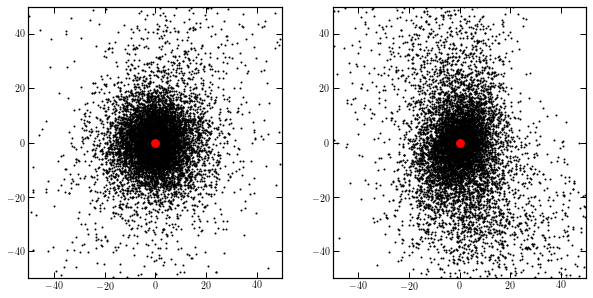

In [340]:
scatter_plot(pos_satellite4[index_bound], 10000)

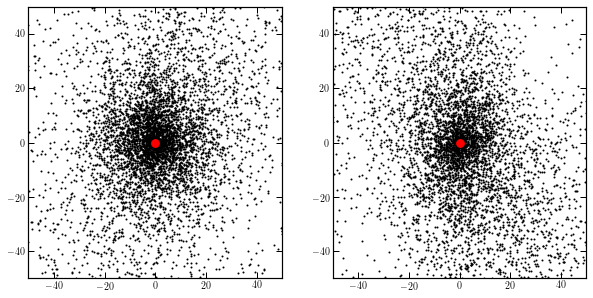

In [454]:
scatter_plot(pos_satellite4[index_unbound], 10000)

In [829]:
rho4_bound, r4_bound, m4_bound, m_c4_bound = enclosed_mass(pos_satellite4[index_bound],
                                                           mass_satellite4[index_bound])

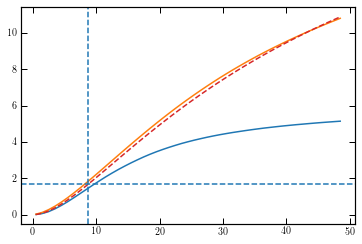

In [831]:
plot(r4_bound, m_c4_bound*len(ids_all)/1e6)
plot(r4, m_c4)
plot(r4, m_hern4, c='C3', ls='--', label='LMC4 ($r_s=${:.1f})'.format(rs_opt4[0]))
axvline(8.7, ls='--')
axhline(1.7, ls='--')

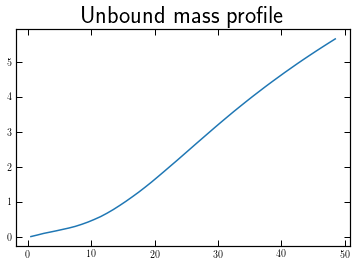

In [832]:
title('Unbound mass profile')
plot(r4, m_c4 - m_c4_bound*len(ids_all)/1e6)

In [833]:
rs_opt_bound4 = find_scale_length(pos_satellite4[index_bound],  
                                  mass_satellite4[index_bound]*len(ids_all)/1e6, 30)
print(rs_opt_bound4[0])
m_hern4 = hernquist_mass(r4, np.sum(mass_satellite4), 25)
m_hern_bound4 = hernquist_mass(r4,  rs_opt_bound4[0], rs_opt_bound4[1])



(array([10.36129373,  7.84364462]), array([[0.09141474, 0.03496362],
       [0.03496362, 0.01470735]]))
10.361293732259734


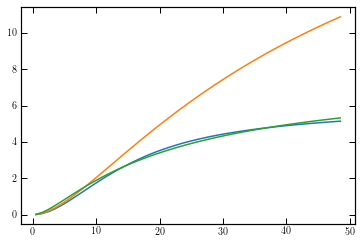

In [834]:
plot(r4_bound, m_c4_bound*len(ids_all)/1e6)
plot(r4_bound, m_hern4)
plot(r4_bound, m_hern_bound4)

In [531]:
name= '../../MW-LMC-SCF/code/lmc_bound_rs/BFE_LMC6_b1_rs2_Sat_snap'
#name= '../../time-dependent-BFE/data/MWLMC5_LMC/BFE_LMC5_b1Sat_snap'
Slmc, Tlmc, Svar, Tvar, STvar = coefficients_smoothing.read_coeffcov_matrix(name, 0, 20, 20, 20, 112, read_type=0)

In [532]:
#mp_scf = 1.84e-06
mp_scf = 2.064e-05

In [533]:
Ssmooth, Tsmooth, N = coefficients_smoothing.smooth_coeff_matrix(Slmc, Tlmc, Svar, 
                                                                 Tvar, STvar,
                                                                 mp_scf,
                                                                 20, 20, 20, sn=8)

../src/coefficients_smoothing.py:175: RuntimeWarning: invalid value encountered in double_scalars
  if Snlm == 0:


In [534]:
lmc_scf = gp.SCFPotential(1, 14, Ssmooth, Tsmooth, units=None)  

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


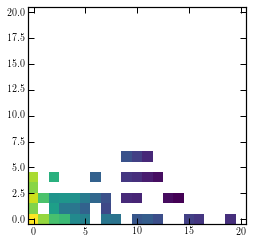

In [535]:
imshow(np.log10(np.abs(Ssmooth[:,:,0].T)), origin='lower')

In [538]:
lmc_scf1 = gp.SCFPotential(1, 10, Ssmooth, Tsmooth, units=None)  
lmc_scf2 = gp.SCFPotential(1, 14, Ssmooth, Tsmooth, units=None)  
lmc_scf3 = gp.SCFPotential(1, 20, Ssmooth, Tsmooth, units=None)  
#lmc_scf1 = gp.SCFPotential(1, 14, Ssmooth, Tsmooth, units=None)  

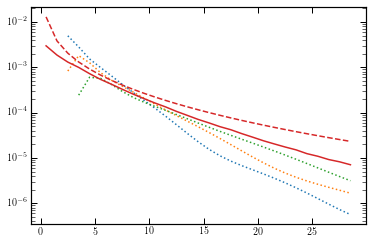

In [544]:
xyz = np.zeros((3, len(r4)))
xyz[0] = r4
plt.semilogy(r4, lmc_scf1.density(xyz), marker='', label='SCF density', ls=':')
plt.semilogy(r4, lmc_scf2.density(xyz), marker='', label='SCF density', ls=':')
plt.semilogy(r4, lmc_scf3.density(xyz), marker='', label='SCF density', ls=':')

plt.semilogy(r4, rho_hern4, c='C3', ls='--')
semilogy(r4, rho4_bound*len(ids_all)/1e6)


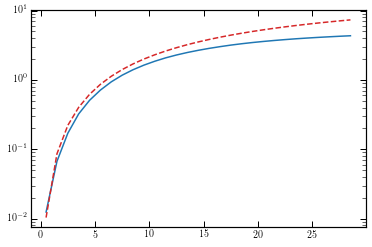

In [558]:
semilogy(r4_bound, m_c4_bound*len(ids_all)/1e6)
semilogy(r4, m_hern4, c='C3', ls='--')


In [545]:
xyz2 = np.zeros((3, 100))
xyz2[0] = np.arange(-50, 50, 1)
xyz2[1] = np.arange(-50, 50, 1)

In [552]:
xgrid = np.arange(-50, 50, 1)
ygrid = np.arange(-50, 50, 1)
X, Y = np.meshgrid(xgrid, ygrid)
xyz2 = np.array([np.zeros_like(X), X, Y])
rho_2d = lmc_scf2.density(xyz2)


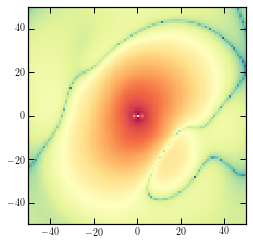

In [553]:
imshow(np.log10(np.abs(rho_2d).value.reshape(100, 100)), cmap='Spectral_r', extent=[-50, 50, -50, 50])

In [524]:
xgrid = np.linspace(-30, 30, 128)
ygrid = np.linspace(-30, 30, 128)
X, Y = np.meshgrid(xgrid, ygrid)
xyz2 = np.array([X.flatten(), np.zeros_like(X.flatten()), Y.flatten()])

In [525]:
rho2 = biff.density(np.ascontiguousarray(xyz2.T), St, Tt, M=1, r_s=25)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


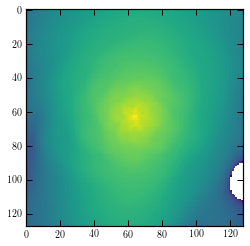

In [526]:
imshow(np.log10(rho2.reshape(128, 128)))